In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt

### Data Simulation

In [2]:
# 1. Simulate data
np.random.seed(42)
n = 1000
income = np.random.normal(50000, 15000, n)
credit_score = np.random.normal(680, 50, n)
loan_amount = np.random.normal(15000, 5000, n)

# Logistic function for delinquency probability
delinquency_prob = 1 / (1 + np.exp(0.0001 * income - 0.01 * credit_score + 0.0002 * loan_amount - 2.5))
delinquent = np.random.binomial(1, delinquency_prob)

# Create DataFrame
df = pd.DataFrame({
    'income': income,
    'credit_score': credit_score,
    'loan_amount': loan_amount,
    'delinquent': delinquent
})

### Model Prediction

In [4]:
# 2. Train/test split
X = df[['income', 'credit_score', 'loan_amount']]
y = df['delinquent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Fit logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

### Tuning

In [5]:
# 5. Compute KS statistic and determine optimal threshold
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
ks_stat = tpr - fpr
ks_max = np.max(ks_stat)
ks_threshold = thresholds[np.argmax(ks_stat)]

print(f"Maximum KS: {ks_max:.2f}")
print(f"Optimal Threshold (KS): {ks_threshold:.2f}")

# 6. Predict using KS-based threshold
y_pred_ks = (y_prob >= ks_threshold).astype(int)

Maximum KS: 0.59
Optimal Threshold (KS): 0.62


### Performance


Confusion Matrix (KS Threshold):
 [[ 66  19]
 [ 40 175]]

Classification Report (KS Threshold):
               precision    recall  f1-score   support

           0       0.62      0.78      0.69        85
           1       0.90      0.81      0.86       215

    accuracy                           0.80       300
   macro avg       0.76      0.80      0.77       300
weighted avg       0.82      0.80      0.81       300

AUC-ROC: 0.86


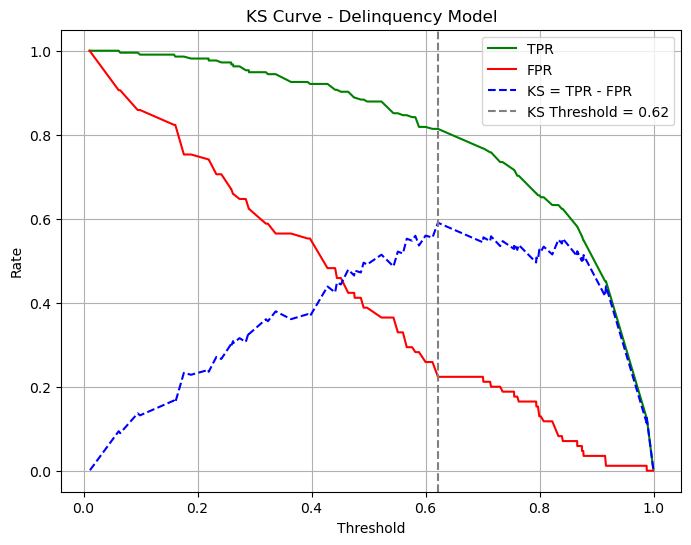

In [6]:
# 7. Evaluate performance
print("\nConfusion Matrix (KS Threshold):\n", confusion_matrix(y_test, y_pred_ks))
print("\nClassification Report (KS Threshold):\n", classification_report(y_test, y_pred_ks))
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.2f}")

# 8. Plot KS curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label="TPR", color="green")
plt.plot(thresholds, fpr, label="FPR", color="red")
plt.plot(thresholds, ks_stat, label="KS = TPR - FPR", color="blue", linestyle="--")
plt.axvline(x=ks_threshold, color='gray', linestyle='--', label=f"KS Threshold = {ks_threshold:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.title("KS Curve - Delinquency Model")
plt.legend()
plt.grid(True)
plt.show()
